#📌 Extracão

In [ ]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

In [ ]:
response = requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json")

In [ ]:
data = response.json()
df_telecom = json_normalize(data)

In [ ]:
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [ ]:
# Remove prefixos como 'customer.', 'phone.', etc. para facilitar a análise
df_telecom.columns = df_telecom.columns.str.replace(r'^[^.]*\.', '', regex=True)

In [ ]:
df_telecom.head(40)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [ ]:
# Verificando se há valores nulos
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
# Pegando todas as colunas
df_telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
# Verificando valores unicos das colunas
df_telecom['PaymentMethod'].unique()


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
# Removendo linhas duplicadas do DF
df_telecom.drop_duplicates(inplace=True)

In [ ]:
# Vendo os tipos por coluna
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)
df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'], errors='coerce')

In [ ]:
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].astype(np.float64)

In [ ]:
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].fillna(0)

In [ ]:
colunas = df_telecom.columns

In [ ]:

for col in colunas:
    if col in df_telecom.columns and df_telecom[col].dtype == 'object':
        df_telecom[col] = (
            df_telecom[col]
            .astype(str)                     # Garante que pode aplicar string methods
            .str.strip()                     # Remove espaços extras
            .str.lower()                     # Converte para minúsculo
            .replace('nan', pd.NA)           # Converte string 'nan' de volta para valor nulo
        )

In [ ]:
df_telecom[colunas].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
for col in colunas:
    print(f"\nFrequência de valores em: {col}")
    print(df_telecom[col].value_counts(dropna=False))


Frequência de valores em: customerID
customerID
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
9970-qbcda    1
9968-ffvvh    1
             ..
0014-bmaqu    1
0013-smeoe    1
0013-mhzwf    1
0013-exchz    1
0011-igkff    1
Name: count, Length: 7267, dtype: int64

Frequência de valores em: Churn
Churn
no     5174
yes    1869
        224
Name: count, dtype: int64

Frequência de valores em: gender
gender
male      3675
female    3592
Name: count, dtype: int64

Frequência de valores em: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Frequência de valores em: Partner
Partner
no     3749
yes    3518
Name: count, dtype: int64

Frequência de valores em: Dependents
Dependents
no     5086
yes    2181
Name: count, dtype: int64

Frequência de valores em: tenure
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64

Frequência de valores em: PhoneService
PhoneService
ye

In [ ]:
df_telecom['Churn'].unique()

array(['no', 'yes', ''], dtype=object)

In [ ]:
df_telecom['Churn'] = df_telecom['Churn'].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_telecom = df_telecom.dropna(subset=['Churn'])

In [ ]:
print(df_telecom.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [ ]:
pd.set_option('display.max_columns', None)
display(df_telecom.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [ ]:
df_telecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,yes,no,no,yes,no,no,one year,no,mailed check,55.15,742.90
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,no,no,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,yes,no,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65


In [ ]:
for col in colunas:
    if df_telecom[col].dtype == 'object':
        df_telecom[col] = df_telecom[col].str.replace(' ', '-', regex=False)

In [ ]:
df_telecom['Contas_Diarias'] = (df_telecom['Charges.Monthly'] / 30).round(2)

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
df_telecom['Churn']

,Churn
0,no
1,no
2,yes
3,yes
4,yes
...,...
7262,no
7263,yes
7264,no
7265,no


In [ ]:
df_telecom['Churn'] = df_telecom['Churn'].map({'yes': 1, 'no': 0})
df_telecom['Partner'] = df_telecom['Partner'].map({'yes': 1, 'no': 0})
df_telecom['Dependents'] = df_telecom['Dependents'].map({'yes': 1, 'no': 0})
df_telecom['PhoneService'] = df_telecom['PhoneService'].map({'yes': 1, 'no': 0})
df_telecom['PaperlessBilling'] = df_telecom['PaperlessBilling'].map({'yes': 1, 'no': 0})

In [ ]:
for col in colunas:
    print(f"\nFrequência de valores em: {col}")
    print(df_telecom[col].value_counts(dropna=False))


Frequência de valores em: customerID
customerID
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
9970-qbcda    1
9968-ffvvh    1
             ..
0014-bmaqu    1
0013-smeoe    1
0013-mhzwf    1
0013-exchz    1
0011-igkff    1
Name: count, Length: 7043, dtype: int64

Frequência de valores em: Churn
Churn
0    5174
1    1869
Name: count, dtype: int64

Frequência de valores em: gender
gender
male      3555
female    3488
Name: count, dtype: int64

Frequência de valores em: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Frequência de valores em: Partner
Partner
0    3641
1    3402
Name: count, dtype: int64

Frequência de valores em: Dependents
Dependents
0    4933
1    2110
Name: count, dtype: int64

Frequência de valores em: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Frequência de valores em: PhoneService
PhoneService
1    6361
0     682
Name: 

In [ ]:
df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one-year,1,mailed-check,65.6,593.30,2.19
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed-check,59.9,542.40,2.00
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber-optic,no,no,yes,no,no,no,month-to-month,1,electronic-check,73.9,280.85,2.46
3,0011-igkff,1,male,1,1,0,13,1,no,fiber-optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic-check,98.0,1237.85,3.27
4,0013-exchz,1,female,1,1,0,3,1,no,fiber-optic,no,no,no,yes,yes,no,month-to-month,1,mailed-check,83.9,267.40,2.80


In [ ]:
df_telecom = df_telecom.rename(columns={
    'icustomerID': 'id_cliente',
    'gender': 'genero',
    'SeniorCitizen': 'senior',
    'Partner': 'parceiro',
    'Dependents': 'dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'telefone',
    'MultipleLines': 'linhas_multiplas',
    'InternetService': 'internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_cabo',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'contrato',
    'PaperlessBilling': 'fatura_eletronica',
    'PaymentMethod': 'pagamento',
    'Charges.Monthly': 'gasto_mensal',
    'Charges.Total': 'gasto_total',
})

In [ ]:
df_telecom

,customerID,Churn,genero,senior,parceiro,dependentes,meses_contrato,telefone,linhas_multiplas,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_cabo,streaming_filmes,contrato,fatura_eletronica,pagamento,gasto_mensal,gasto_total,Contas_Diarias
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one-year,1,mailed-check,65.60,593.30,2.19
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed-check,59.90,542.40,2.00
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber-optic,no,no,yes,no,no,no,month-to-month,1,electronic-check,73.90,280.85,2.46
3,0011-igkff,1,male,1,1,0,13,1,no,fiber-optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic-check,98.00,1237.85,3.27
4,0013-exchz,1,female,1,1,0,3,1,no,fiber-optic,no,no,no,yes,yes,no,month-to-month,1,mailed-check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,0,female,0,0,0,13,1,no,dsl,yes,no,no,yes,no,no,one-year,0,mailed-check,55.15,742.90,1.84
7263,9992-rramn,1,male,0,1,0,22,1,yes,fiber-optic,no,no,no,no,no,yes,month-to-month,1,electronic-check,85.10,1873.70,2.84
7264,9992-ujoel,0,male,0,0,0,2,1,no,dsl,no,yes,no,no,no,no,month-to-month,1,mailed-check,50.30,92.75,1.68
7265,9993-lhieb,0,male,0,1,1,67,1,no,dsl,yes,no,yes,yes,no,yes,two-year,0,mailed-check,67.85,4627.65,2.26


In [ ]:
df_telecom['streaming_filmes'].unique()

array(['no', 'yes', 'no-internet-service'], dtype=object)

In [ ]:
df_telecom = df_telecom.rename(columns={
    'customerID': 'id_cliente',
})


In [ ]:
df_telecom[df_telecom.duplicated(subset=['id_cliente'], keep=False)]

,id_cliente,Churn,genero,senior,parceiro,dependentes,meses_contrato,telefone,linhas_multiplas,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_cabo,streaming_filmes,contrato,fatura_eletronica,pagamento,gasto_mensal,gasto_total,Contas_Diarias


#📊 Carga e análise

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_telecom.describe()

,Churn,senior,parceiro,dependentes,meses_contrato,telefone,fatura_eletronica,gasto_mensal,gasto_total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


<ipython-input-41-a9503e15629f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_telecom, palette=['#66bb6a', '#ef5350'])


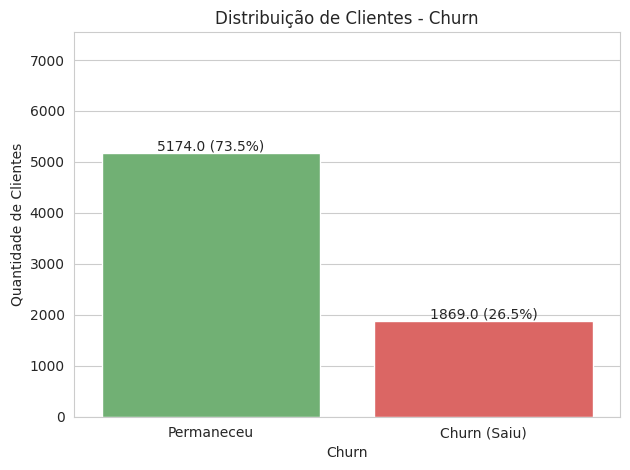

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
ax = sns.countplot(x='Churn', data=df_telecom, palette=['#66bb6a', '#ef5350'])

# Ajusta limite do eixo y para o número máximo de clientes (ou um pouco acima para "folga")
max_y = len(df_telecom)  # total de clientes, exemplo 7000
ax.set_ylim(0, max_y + 500)  # +500 para dar espaço acima da barra

# Adiciona rótulos com número e porcentagem
total = len(df_telecom)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribuição de Clientes - Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Permaneceu', 'Churn (Saiu)'])
plt.tight_layout()
plt.show()


In [ ]:
tabela_churn_genero = df_telecom[['Churn', 'genero']]

In [ ]:
tabela_churn_genero = tabela_churn_genero[tabela_churn_genero['genero'].isin(['male', 'female'])]


In [ ]:
tabela_churn_genero.head()

,Churn,genero
0,0,female
1,0,male
2,1,male
3,1,male
4,1,female


In [ ]:
resumo = tabela_churn_genero.groupby(['genero', 'Churn']).size().reset_index(name='Quantidade')
print(resumo)


   genero  Churn  Quantidade
0  female      0        2549
1  female      1         939
2    male      0        2625
3    male      1         930


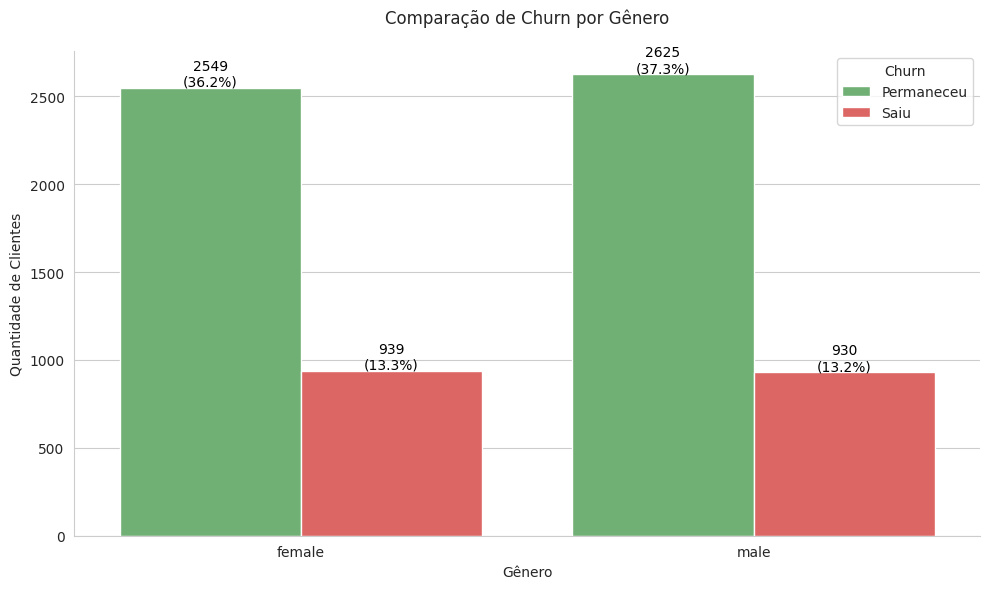

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.countplot(x='genero', hue='Churn', data=df_telecom, palette=['#66bb6a', '#ef5350'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

total = len(df_telecom)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percentage = 100 * height / total
        ax.text(x, height + 10, f'{int(height)}\n({percentage:.1f}%)', ha='center', color='black', fontsize=10)

plt.title('Comparação de Churn por Gênero', pad=20)
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
plt.tight_layout()
plt.show()


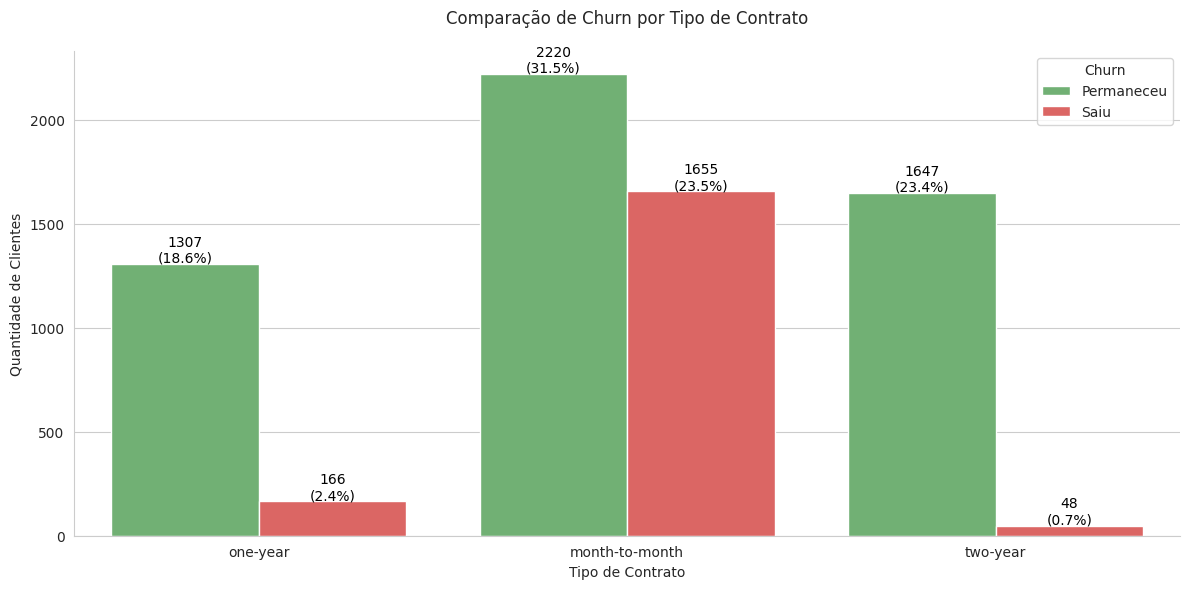

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Aumentado para acomodar mais categorias
sns.set_style("whitegrid")

# Gráfico de churn por tipo de contrato
ax = sns.countplot(x='contrato', hue='Churn', data=df_telecom, palette=['#66bb6a', '#ef5350'])

# Limpa bordas superiores e laterais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Total de clientes (para calcular %)
total = len(df_telecom)

# Adiciona números e percentuais nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percentage = 100 * height / total
        ax.text(x, height + 10, f'{int(height)}\n({percentage:.1f}%)', ha='center', color='black', fontsize=10)

# Título e rótulos
plt.title('Comparação de Churn por Tipo de Contrato', pad=20)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
plt.tight_layout()
plt.show()


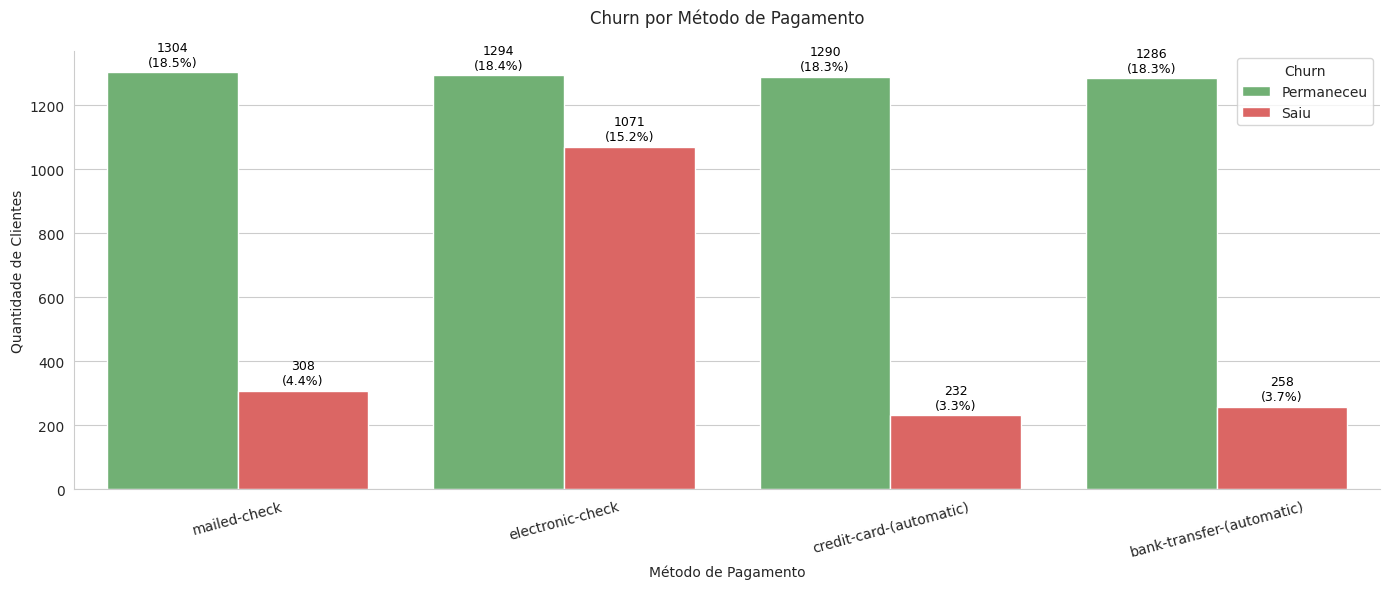

In [ ]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Gráfico com Seaborn
ax = sns.countplot(
    x='pagamento',
    hue='Churn',
    data=df_telecom,
    palette=['#66bb6a', '#ef5350']
)

# Remove bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Total de clientes (para cálculo percentual)
total = len(df_telecom)

# Adiciona contagens e porcentagens nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percentage = 100 * height / total
        ax.text(x, height + 10, f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', color='black', fontsize=9)

# Título e ajustes
plt.title('Churn por Método de Pagamento', pad=20)
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=15)
plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
plt.tight_layout()
plt.show()


<ipython-input-49-2da84e63ee4c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y='gasto_mensal', data=df_telecom, palette=['#66bb6a', '#ef5350'])


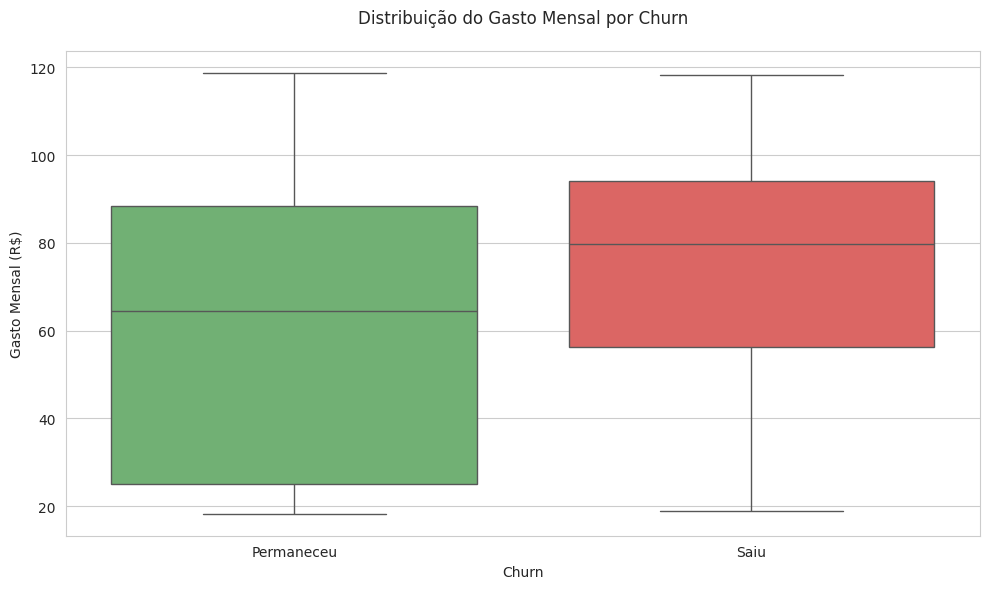

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.boxplot(x='Churn', y='gasto_mensal', data=df_telecom, palette=['#66bb6a', '#ef5350'])

# Título e eixos
plt.title('Distribuição do Gasto Mensal por Churn', pad=20)
plt.xlabel('Churn')
plt.ylabel('Gasto Mensal (R$)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.tight_layout()
plt.show()


In [ ]:
df_telecom.head()

,id_cliente,Churn,genero,senior,parceiro,dependentes,meses_contrato,telefone,linhas_multiplas,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_cabo,streaming_filmes,contrato,fatura_eletronica,pagamento,gasto_mensal,gasto_total,Contas_Diarias
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one-year,1,mailed-check,65.6,593.30,2.19
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed-check,59.9,542.40,2.00
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber-optic,no,no,yes,no,no,no,month-to-month,1,electronic-check,73.9,280.85,2.46
3,0011-igkff,1,male,1,1,0,13,1,no,fiber-optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic-check,98.0,1237.85,3.27
4,0013-exchz,1,female,1,1,0,3,1,no,fiber-optic,no,no,no,yes,yes,no,month-to-month,1,mailed-check,83.9,267.40,2.80


<ipython-input-51-048f07f1a97c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['< 65 anos', '>= 65 anos'])  # Rotula como faixas etárias


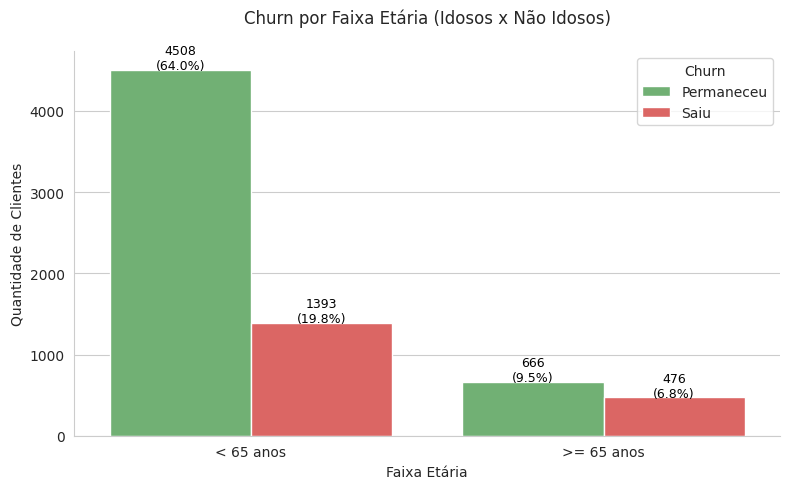

Total de clientes: 7043
Total de clientes idosos (>= 65 anos): 1142
Porcentagem de clientes idosos: 16.21%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Gráfico de barras com hue=Churn
ax = sns.countplot(x='senior', hue='Churn', data=df_telecom, palette=['#66bb6a', '#ef5350'])

# Personaliza eixos
ax.set_xticklabels(['< 65 anos', '>= 65 anos'])  # Rotula como faixas etárias
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Clientes')
plt.title('Churn por Faixa Etária (Idosos x Não Idosos)', pad=20)

# Remove bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adiciona valores e porcentagens
total = len(df_telecom)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        percent = 100 * height / total
        ax.text(x, height + 5, f'{int(height)}\n({percent:.1f}%)', ha='center', fontsize=9, color='black')

# Legenda
plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
plt.tight_layout()
plt.show()

# Total de clientes
total_clientes = len(df_telecom)

# Total de clientes idosos (senior == 1)
total_idosos = df_telecom[df_telecom['senior'] == 1].shape[0]

# Porcentagem de idosos
percentual_idosos = 100 * total_idosos / total_clientes

print(f'Total de clientes: {total_clientes}')
print(f'Total de clientes idosos (>= 65 anos): {total_idosos}')
print(f'Porcentagem de clientes idosos: {percentual_idosos:.2f}%')


In [ ]:
# Calcula churn rate (média de churn) por grupo senior
taxa_churn_por_idade = df_telecom.groupby('senior')['Churn'].mean().reset_index()

# Renomeia para legibilidade
taxa_churn_por_idade['senior'] = taxa_churn_por_idade['senior'].map({0: 'Não Seniores (<65)', 1: 'Seniores (>=65)'})

# Converte para percentual
taxa_churn_por_idade['Churn (%)'] = taxa_churn_por_idade['Churn'] * 100

print(taxa_churn_por_idade)


               senior     Churn  Churn (%)
0  Não Seniores (<65)  0.236062  23.606168
1     Seniores (>=65)  0.416813  41.681261


<ipython-input-53-a6e903626348>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='senior', y='Churn (%)', data=taxa_churn_por_idade, palette=['#66bb6a', '#ef5350'])


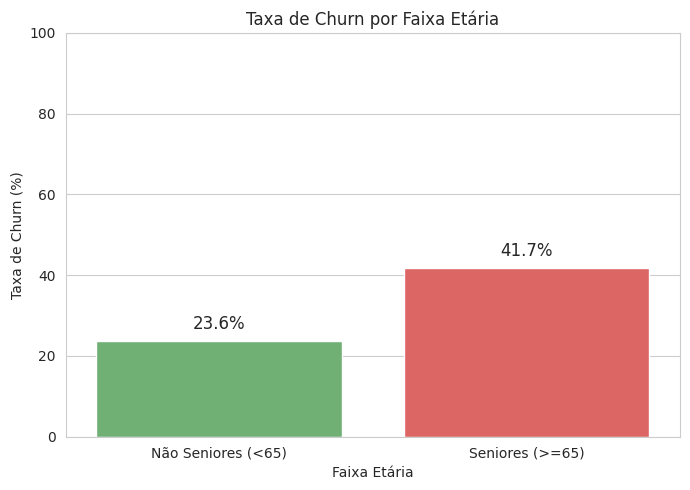

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='senior', y='Churn (%)', data=taxa_churn_por_idade, palette=['#66bb6a', '#ef5350'])

plt.title('Taxa de Churn por Faixa Etária')
plt.ylabel('Taxa de Churn (%)')
plt.xlabel('Faixa Etária')
plt.ylim(0, 100)

# Anota os valores na barra
for i, row in taxa_churn_por_idade.iterrows():
    plt.text(i, row['Churn (%)'] + 3, f"{row['Churn (%)']:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Agrupa por parceiro e calcula churn médio e contagem
resumo_parceiro = df_telecom.groupby('parceiro')['Churn'].agg(['mean', 'count']).reset_index()

# Renomeia colunas para melhor entendimento
resumo_parceiro.columns = ['parceiro', 'taxa_churn', 'total_clientes']

# Mapeia 0/1 para rótulos legíveis
resumo_parceiro['parceiro'] = resumo_parceiro['parceiro'].map({0: 'Sem Parceiro', 1: 'Com Parceiro'})

# Converte churn para porcentagem
resumo_parceiro['taxa_churn (%)'] = resumo_parceiro['taxa_churn'] * 100

# Exibe o resumo formatado
print(resumo_parceiro[['parceiro', 'total_clientes', 'taxa_churn (%)']])


       parceiro  total_clientes  taxa_churn (%)
0  Sem Parceiro            3641       32.957979
1  Com Parceiro            3402       19.664903


<ipython-input-55-78eca77e97d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parceiro', y='taxa_churn (%)', data=resumo_parceiro, palette=['#ef5350', '#66bb6a'])


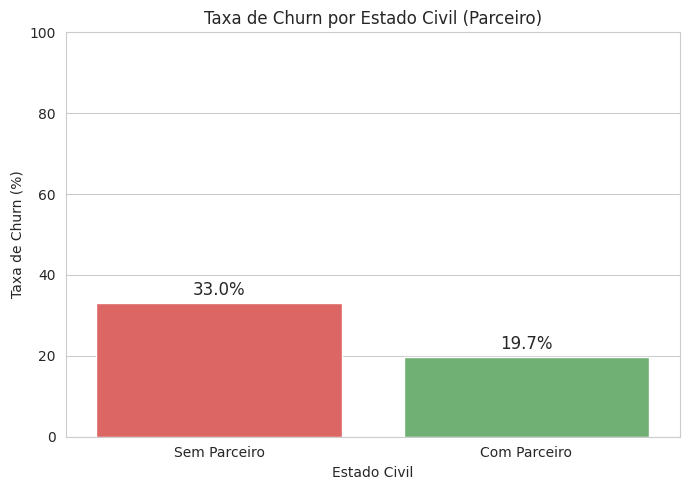

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='parceiro', y='taxa_churn (%)', data=resumo_parceiro, palette=['#ef5350', '#66bb6a'])

plt.title('Taxa de Churn por Estado Civil (Parceiro)')
plt.xlabel('Estado Civil')
plt.ylabel('Taxa de Churn (%)')
plt.ylim(0, 100)

# Anota valores nas barras
for i, row in resumo_parceiro.iterrows():
    plt.text(i, row['taxa_churn (%)'] + 2, f"{row['taxa_churn (%)']:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Agrupa por dependentes e calcula churn médio e total
resumo_dependentes = df_telecom.groupby('dependentes')['Churn'].agg(['mean', 'count']).reset_index()

# Renomeia colunas
resumo_dependentes.columns = ['dependentes', 'taxa_churn', 'total_clientes']

# Mapeia 0/1 para rótulos
resumo_dependentes['dependentes'] = resumo_dependentes['dependentes'].map({0: 'Sem Dependentes', 1: 'Com Dependentes'})

# Converte churn para porcentagem
resumo_dependentes['taxa_churn (%)'] = resumo_dependentes['taxa_churn'] * 100

# Exibe resumo formatado
print(resumo_dependentes[['dependentes', 'total_clientes', 'taxa_churn (%)']])


       dependentes  total_clientes  taxa_churn (%)
0  Sem Dependentes            4933       31.279140
1  Com Dependentes            2110       15.450237


<ipython-input-57-5531b4d3efc8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dependentes', y='taxa_churn (%)', data=resumo_dependentes, palette=['#ef5350', '#66bb6a'])


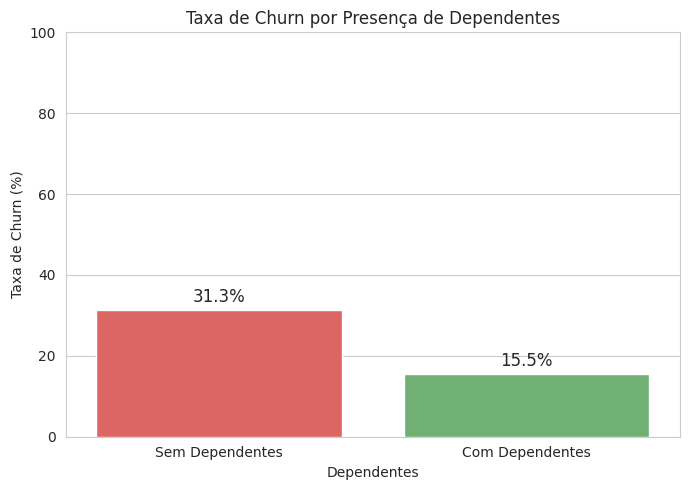

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='dependentes', y='taxa_churn (%)', data=resumo_dependentes, palette=['#ef5350', '#66bb6a'])

plt.title('Taxa de Churn por Presença de Dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Taxa de Churn (%)')
plt.ylim(0, 100)

# Anota os valores em cima das barras
for i, row in resumo_dependentes.iterrows():
    plt.text(i, row['taxa_churn (%)'] + 2, f"{row['taxa_churn (%)']:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-58-0061e9aeaa0b>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumo_meses = df_telecom.groupby('faixa_meses')['Churn'].agg(['mean', 'count']).reset_index()


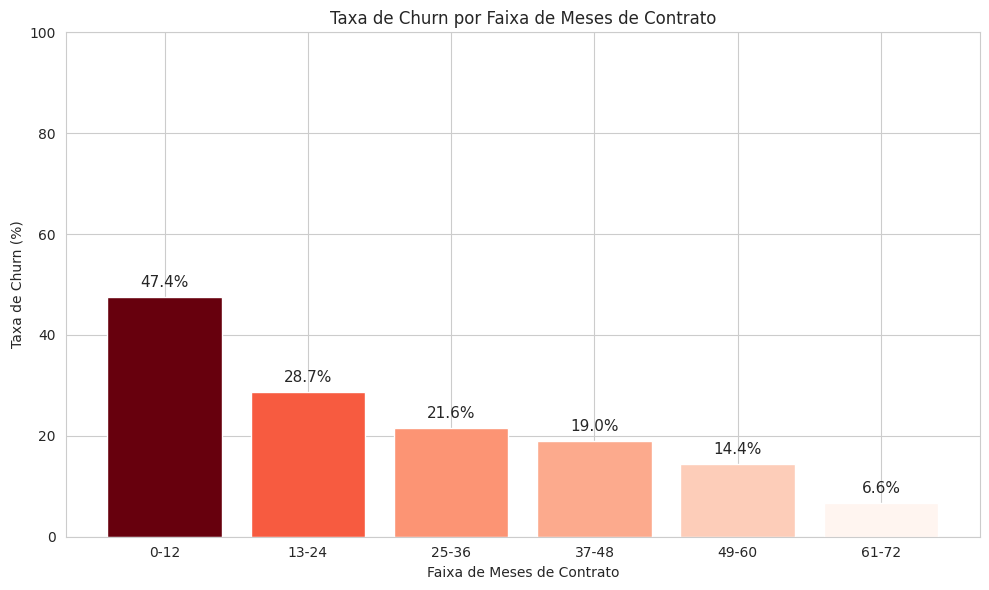

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar faixas de meses de contrato
bins = [0, 12, 24, 36, 48, 60, df_telecom['meses_contrato'].max()]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', f'61-{int(df_telecom["meses_contrato"].max())}']

df_telecom['faixa_meses'] = pd.cut(df_telecom['meses_contrato'], bins=bins, labels=labels, right=True, include_lowest=True)

# Agrupar por faixa e calcular churn médio e total de clientes
resumo_meses = df_telecom.groupby('faixa_meses')['Churn'].agg(['mean', 'count']).reset_index()
resumo_meses.columns = ['faixa_meses', 'taxa_churn', 'total_clientes']
resumo_meses['taxa_churn (%)'] = resumo_meses['taxa_churn'] * 100

# Normalizar taxa churn para cores
norm = plt.Normalize(resumo_meses['taxa_churn (%)'].min(), resumo_meses['taxa_churn (%)'].max())
cmap = plt.cm.Reds  # Paleta do claro para o vermelho forte
colors = cmap(norm(resumo_meses['taxa_churn (%)']))

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(resumo_meses['faixa_meses'], resumo_meses['taxa_churn (%)'], color=colors)

plt.title('Taxa de Churn por Faixa de Meses de Contrato')
plt.xlabel('Faixa de Meses de Contrato')
plt.ylabel('Taxa de Churn (%)')
plt.ylim(0, 100)

# Valores nas barras
for bar, value in zip(bars, resumo_meses['taxa_churn (%)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{value:.1f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
# Agrupa por telefone e calcula churn médio e total de clientes
resumo_telefone = df_telecom.groupby('telefone')['Churn'].agg(['mean', 'count']).reset_index()

# Renomeia colunas para melhor entendimento
resumo_telefone.columns = ['telefone', 'taxa_churn', 'total_clientes']

# Mapeia valores para rótulos legíveis
resumo_telefone['telefone'] = resumo_telefone['telefone'].map({0: 'Sem Telefone', 1: 'Com Telefone'})

# Converte churn para porcentagem
resumo_telefone['taxa_churn (%)'] = resumo_telefone['taxa_churn'] * 100

# Exibe o resumo formatado
print(resumo_telefone[['telefone', 'total_clientes', 'taxa_churn (%)']])


       telefone  total_clientes  taxa_churn (%)
0  Sem Telefone             682       24.926686
1  Com Telefone            6361       26.709637


<ipython-input-60-0824214b693d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='telefone', y='taxa_churn (%)', data=resumo_telefone, palette=['#ef5350', '#66bb6a'])


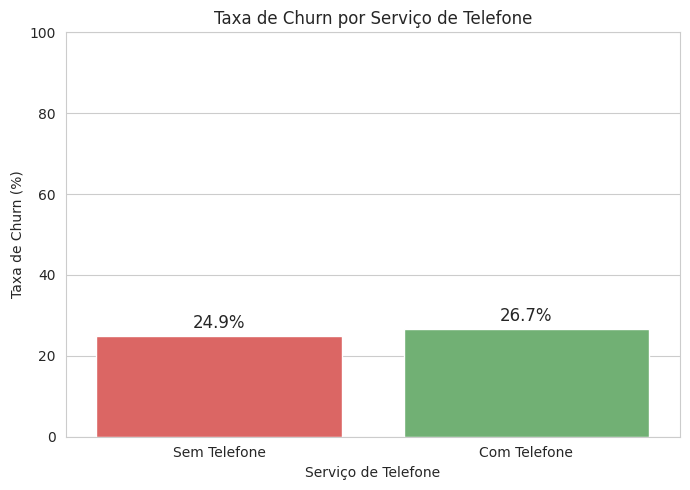

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='telefone', y='taxa_churn (%)', data=resumo_telefone, palette=['#ef5350', '#66bb6a'])

plt.title('Taxa de Churn por Serviço de Telefone')
plt.xlabel('Serviço de Telefone')
plt.ylabel('Taxa de Churn (%)')
plt.ylim(0, 100)

# Anota valores acima das barras
for i, row in resumo_telefone.iterrows():
    plt.text(i, row['taxa_churn (%)'] + 2, f"{row['taxa_churn (%)']:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
df_telecom.head(1)

,id_cliente,Churn,genero,senior,parceiro,dependentes,meses_contrato,telefone,linhas_multiplas,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_cabo,streaming_filmes,contrato,fatura_eletronica,pagamento,gasto_mensal,gasto_total,Contas_Diarias,faixa_meses
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one-year,1,mailed-check,65.6,593.3,2.19,0-12


<ipython-input-62-61b1612a1b0b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


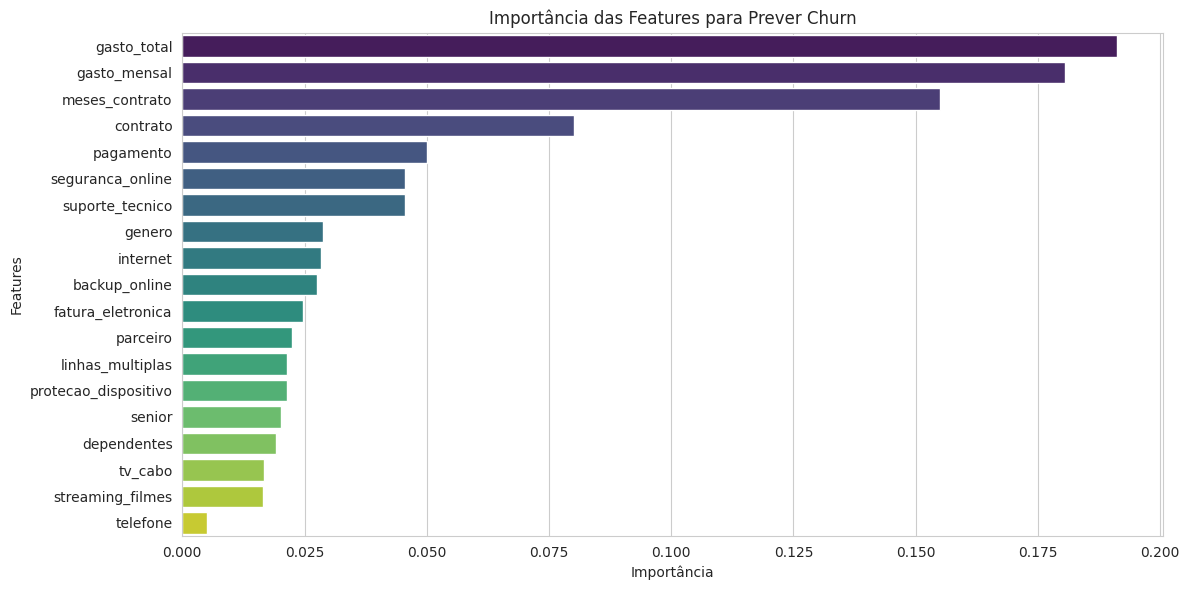

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que seu DataFrame já esteja carregado como df_telecom

# Selecionar colunas relevantes (sem id_cliente e churn)
cols = ['genero', 'senior', 'parceiro', 'dependentes', 'meses_contrato', 'telefone',
        'linhas_multiplas', 'internet', 'seguranca_online', 'backup_online',
        'protecao_dispositivo', 'suporte_tecnico', 'tv_cabo', 'streaming_filmes',
        'contrato', 'fatura_eletronica', 'pagamento', 'gasto_mensal', 'gasto_total']

X = df_telecom[cols].copy()
y = df_telecom['Churn'].astype(int)

# Tratar variáveis categóricas
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Importância das features
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plotar gráfico
plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title('Importância das Features para Prever Churn')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
# Lista das colunas e seus possíveis valores (tipos)
servicos = {
    'telefone': [0,1],  # assumo booleano (0=sem, 1=com)
    'linhas_multiplas': ['no', 'yes', 'no-phone-service'],  # ajuste se precisar
    'internet': ['dsl', 'fiber-optic', 'no'],
    'seguranca_online': ['no', 'yes', 'no-internet-service'],
    'backup_online': ['yes', 'no', 'no-internet-service'],
    'protecao_dispositivo': ['no', 'yes', 'no-internet-service'],
    'suporte_tecnico': ['yes', 'no', 'no-internet-service'],
    'tv_cabo': ['yes', 'no', 'no-internet-service'],
    'streaming_filmes': ['no', 'yes', 'no-internet-service']
}

for servico, categorias in servicos.items():
    print(f"\nResumo churn para o serviço '{servico}':")
    resumo = df_telecom.groupby(servico)['Churn'].agg(['mean', 'count']).reset_index()
    resumo['taxa_churn (%)'] = resumo['mean'] * 100
    resumo.rename(columns={'mean':'taxa_churn', 'count':'total_clientes'}, inplace=True)

    # Mostrar só as categorias que aparecem na base (filtra as esperadas)
    resumo = resumo[resumo[servico].isin(categorias)]

    # Formatar para facilitar leitura
    print(resumo[[servico, 'total_clientes', 'taxa_churn (%)']].sort_values(by='taxa_churn (%)', ascending=False))



Resumo churn para o serviço 'telefone':
   telefone  total_clientes  taxa_churn (%)
1         1            6361       26.709637
0         0             682       24.926686

Resumo churn para o serviço 'linhas_multiplas':
   linhas_multiplas  total_clientes  taxa_churn (%)
2               yes            2971       28.609896
0                no            3390       25.044248
1  no-phone-service             682       24.926686

Resumo churn para o serviço 'internet':
      internet  total_clientes  taxa_churn (%)
1  fiber-optic            3096       41.892765
0          dsl            2421       18.959108
2           no            1526        7.404980

Resumo churn para o serviço 'seguranca_online':
      seguranca_online  total_clientes  taxa_churn (%)
0                   no            3498       41.766724
2                  yes            2019       14.611194
1  no-internet-service            1526        7.404980

Resumo churn para o serviço 'backup_online':
         backup_online  to

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

def gerar_figura_churn(df_telecom):
    servicos = {
        'telefone': [0,1],
        'linhas_multiplas': ['no', 'yes', 'no-phone-service'],
        'internet': ['dsl', 'fiber-optic', 'no'],
        'seguranca_online': ['no', 'yes', 'no-internet-service'],
        'backup_online': ['yes', 'no', 'no-internet-service'],
        'protecao_dispositivo': ['no', 'yes', 'no-internet-service'],
        'suporte_tecnico': ['yes', 'no', 'no-internet-service'],
        'tv_cabo': ['yes', 'no', 'no-internet-service'],
        'streaming_filmes': ['no', 'yes', 'no-internet-service']
    }

    df_list = []
    for servico, categorias in servicos.items():
        resumo = df_telecom.groupby(servico)['Churn'].agg(['mean', 'count']).reset_index()
        resumo = resumo[resumo[servico].isin(categorias)]
        resumo['taxa_churn (%)'] = resumo['mean'] * 100
        resumo.rename(columns={servico: 'categoria', 'count': 'total_clientes', 'mean': 'taxa_churn'}, inplace=True)
        resumo['servico'] = servico
        df_list.append(resumo[['servico', 'categoria', 'total_clientes', 'taxa_churn (%)']])

    df_plotly = pd.concat(df_list, ignore_index=True)

    colors = px.colors.qualitative.Pastel  # cores suaves
    servicos_lista = list(servicos.keys())

    fig = go.Figure()

    for i, servico in enumerate(servicos_lista):
        df_sub = df_plotly[df_plotly['servico'] == servico]
        cat_colors = {cat: colors[j % len(colors)] for j, cat in enumerate(df_sub['categoria'])}
        for cat in df_sub['categoria']:
            df_cat = df_sub[df_sub['categoria'] == cat]
            visible = True if i == 0 else False
            fig.add_trace(go.Bar(
                x=[cat],
                y=df_cat['taxa_churn (%)'],
                name=str(cat),
                marker_color=cat_colors[cat],
                visible=visible,
                text=f"{df_cat['taxa_churn (%)'].values[0]:.1f}%",
                textposition='outside',
                hovertemplate=(
                    f"Serviço: {servico.capitalize()}<br>" +
                    f"Categoria: {cat}<br>" +
                    f"Taxa de Churn: {df_cat['taxa_churn (%)'].values[0]:.2f}%<br>" +
                    f"Total Clientes: {df_cat['total_clientes'].values[0]}<extra></extra>"
                ),
                marker_line_width=1.5,
                marker_line_color='rgba(0,0,0,0.15)',
                marker_pattern_shape=''  # remover padrões para visual clean
            ))

    start_idx = 0
    buttons = []
    for i, servico in enumerate(servicos_lista):
        n_cats = len(df_plotly[df_plotly['servico'] == servico])
        visible = [False] * len(fig.data)
        for j in range(start_idx, start_idx + n_cats):
            visible[j] = True
        start_idx += n_cats
        buttons.append(dict(
            label=servico.capitalize(),
            method='update',
            args=[{'visible': visible},
                  {'title': f'Taxa de Churn por categoria do serviço: {servico.capitalize()}',
                   'xaxis': {'title': 'Categoria', 'tickangle': -30},
                   'yaxis': {'title': 'Taxa de Churn (%)', 'range': [0, df_plotly['taxa_churn (%)'].max()*1.2]}}]
        ))

    fig.update_layout(
        updatemenus=[dict(
            active=0,
            buttons=buttons,
            x=0,
            y=1.15,
            xanchor='left',
            yanchor='top',
            bgcolor='rgba(255,255,255,0.95)',
            bordercolor='LightGray',
            borderwidth=1,
            font=dict(size=14, family='Segoe UI, Tahoma, Geneva, Verdana, sans-serif')
        )],
        title=dict(text=f'Taxa de Churn por categoria do serviço: {servicos_lista[0].capitalize()}',
                   font=dict(size=22, family='Segoe UI', color='#2a3f5f')),
        template='simple_white',
        height=550,
        margin=dict(t=120, b=80, l=60, r=30),
        font=dict(family='Segoe UI, Tahoma, Geneva, Verdana, sans-serif', size=14, color='#2a3f5f'),
        legend_title_text='Categoria',
        legend=dict(
            title_font_family='Segoe UI',
            font=dict(size=13),
            bgcolor='rgba(245,245,245,0.8)',
            bordercolor='LightGray',
            borderwidth=1,
            orientation='v',
            yanchor='top',
            y=0.95,
            xanchor='right',
            x=1.02
        ),
        bargap=0.35,
    )

    return fig

figura_churn = gerar_figura_churn(df_telecom)
figura_churn.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px

# Selecionar colunas relevantes (excluindo id_cliente e colunas irrelevantes)
colunas = [
    'genero', 'senior', 'parceiro', 'dependentes', 'meses_contrato', 'telefone',
    'linhas_multiplas', 'internet', 'seguranca_online', 'backup_online',
    'protecao_dispositivo', 'suporte_tecnico', 'tv_cabo', 'streaming_filmes',
    'contrato', 'fatura_eletronica', 'pagamento', 'gasto_mensal', 'gasto_total'
]

# Criar cópia do dataframe e remover linhas com dados faltantes (se houver)
df_model = df_telecom[colunas + ['Churn']].copy().dropna()

# Codificar variáveis categóricas (LabelEncoder para simplicidade)
le_dict = {}
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        le_dict[col] = le

# Separar features e target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Treinar modelo Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Obter importância das features
importances = rf.feature_importances_
feat_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feat_importance = feat_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

top_n = 7
df_top = feat_importance.head(top_n)

colors = px.colors.qualitative.Safe  # nova paleta

fig1 = go.Figure(go.Bar(
    x=df_top['importance'],
    y=df_top['feature'],
    orientation='h',
    marker=dict(color=colors[:top_n]),
    text=[f"{v:.3f}" for v in df_top['importance']],
    textposition='outside'
))

fig1.update_layout(
    title="Top 7 categorias mais Relevantes para o Churn",
    xaxis_title="Importância",
    yaxis_title="Variável",
    yaxis=dict(autorange='reversed'),
    template='plotly_white',
    height=450,
    margin=dict(l=120, r=40, t=80, b=40),
    font=dict(family='Segoe UI', size=14)
)

fig1.show()


In [ ]:
df_telecom.head(10)

,id_cliente,Churn,genero,senior,parceiro,dependentes,meses_contrato,telefone,linhas_multiplas,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_cabo,streaming_filmes,contrato,fatura_eletronica,pagamento,gasto_mensal,gasto_total,Contas_Diarias,faixa_meses
0,0002-orfbo,0,female,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one-year,1,mailed-check,65.60,593.30,2.19,0-12
1,0003-mknfe,0,male,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed-check,59.90,542.40,2.00,0-12
2,0004-tlhlj,1,male,0,0,0,4,1,no,fiber-optic,no,no,yes,no,no,no,month-to-month,1,electronic-check,73.90,280.85,2.46,0-12
3,0011-igkff,1,male,1,1,0,13,1,no,fiber-optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic-check,98.00,1237.85,3.27,13-24
4,0013-exchz,1,female,1,1,0,3,1,no,fiber-optic,no,no,no,yes,yes,no,month-to-month,1,mailed-check,83.90,267.40,2.80,0-12
5,0013-mhzwf,0,female,0,0,1,9,1,no,dsl,no,no,no,yes,yes,yes,month-to-month,1,credit-card-(automatic),69.40,571.45,2.31,0-12
6,0013-smeoe,0,female,1,1,0,71,1,no,fiber-optic,yes,yes,yes,yes,yes,yes,two-year,1,bank-transfer-(automatic),109.70,7904.25,3.66,61-72
7,0014-bmaqu,0,male,0,1,0,63,1,yes,fiber-optic,yes,no,no,yes,no,no,two-year,1,credit-card-(automatic),84.65,5377.80,2.82,61-72
8,0015-uocoj,0,female,1,0,0,7,1,no,dsl,yes,no,no,no,no,no,month-to-month,1,electronic-check,48.20,340.35,1.61,0-12
9,0016-qljis,0,female,0,1,1,65,1,yes,dsl,yes,yes,yes,yes,yes,yes,two-year,1,mailed-check,90.45,5957.90,3.02,61-72


In [ ]:
correlacoes = df_telecom.corr(numeric_only=True)

In [ ]:
correlacoes

,Churn,senior,parceiro,dependentes,meses_contrato,telefone,fatura_eletronica,gasto_mensal,gasto_total,Contas_Diarias
Churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,0.193412
senior,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.220147
parceiro,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,0.096909
dependentes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.113939
meses_contrato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,0.247910
telefone,0.011942,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.247361
fatura_eletronica,0.191825,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.352135
gasto_mensal,0.193356,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.999996
gasto_total,-0.198324,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,0.651189
Contas_Diarias,0.193412,0.220147,0.096909,-0.113939,0.247910,0.247361,0.352135,0.999996,0.651189,1.000000


In [ ]:
correlacoes_churn = correlacoes['Churn'].sort_values(ascending=False)
print(correlacoes_churn)

Churn                1.000000
Contas_Diarias       0.193412
gasto_mensal         0.193356
fatura_eletronica    0.191825
senior               0.150889
telefone             0.011942
parceiro            -0.150448
dependentes         -0.164221
gasto_total         -0.198324
meses_contrato      -0.352229
Name: Churn, dtype: float64


In [ ]:
df_telecom.groupby('Churn')['Contas_Diarias'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,2.04208,1.036492,0.61,0.84,2.15,2.95,3.96
1,1869.0,2.48145,0.822287,0.63,1.87,2.66,3.14,3.94


#📄Relatorio Final

## Introdução

Esta análise de **Churn (evasão de clientes)** da empresa **TelecomX**, provedora de serviços online e internet, tem como objetivo identificar os principais perfis e comportamentos dos clientes que estão cancelando seus serviços. A partir disso, buscamos gerar **insights e recomendações práticas** para reduzir esse número e melhorar a retenção de clientes.

## Limpeza e Tratamento de Dados

Durante o processo de **ETL (Extração, Transformação e Carga dos dados)**, foi necessário realizar uma limpeza e padronização para garantir uma análise precisa e confiável, sem interferências por dados inconsistentes.

Utilizamos as bibliotecas **Pandas** e **NumPy** em Python para todas as etapas de tratamento. Os principais passos foram:

1 -**Extração**: os dados foram obtidos de uma API fornecida pela TelecomX, no formato JSON. Em seguida, fizemos a normalização para organizá-los em uma estrutura de fácil leitura e análise.

2- **Tratamento de dados**:

- Remoção de **prefixos desnecessários** nos nomes das colunas.
- Eliminação de **valores nulos** e **linhas duplicadas**.
- Correção dos **tipos de dados**, como conversão de strings para números (ex: `float`).
- Padronização dos textos: tudo foi transformado em letras minúsculas e sem espaços extras.
- Conversão de colunas booleanas com valores "Yes" e "No" para **0 e 1**, facilitando as análises numéricas.
- Tradução dos nomes das colunas do **inglês para o português**, garantindo clareza para os stakeholders não técnicos.
- Criação da nova coluna **`Contas_Diarias`**, calculada como `gasto_mensal / 30`, para melhor entender o comportamento financeiro diário dos clientes.
- Normalização geral das colunas, garantindo que todos os dados estivessem prontos para análise sem erros.

## **Análise Exploratória de Dados**

Iniciamos a análise exploratória identificando os **7 principais fatores associados ao churn**, com o objetivo de entender melhor quais grupos de clientes estão mais propensos a cancelar os serviços.

### 1-Nesta etapa, analisamos a distribuição geral dos clientes para entender **quantos permaneceram** e **quantos cancelaram** os serviços da TelecomX.

Observamos que a empresa possui **mais de 7 mil clientes ativos**, e a **maioria optou por continuar com os serviços**. No entanto, cerca de **26% dos clientes se evadiram (churn)**, o que representa uma **fatia significativa** da base total.

Essa taxa de churn já é suficiente para causar **impacto financeiro e estratégico** para a empresa, indicando a necessidade de ações voltadas à **retenção e fidelização**.

![image.png](attachment:5bc15d9d-3531-4b9d-b33c-6cd8d52bb537:image.png)


### 2- Ao comparar a evasão de clientes por gênero, observamos que **não há diferença significativa entre homens e mulheres**. Ambos os grupos apresentam **taxas de churn muito semelhantes**, o que indica que o gênero **não é um fator relevante** na decisão de cancelamento dos serviços.

Portanto, **o impacto do gênero no churn é mínimo**, e outras variáveis devem ser priorizadas na análise de comportamento dos clientes.

![image.png](attachment:5bc15d9d-3531-4b9d-b33c-6cd8d52bb537:image.png)

### 3- Ao analisar o churn (evasão de clientes) com base no tipo de contrato, observamos que os contratos mensais apresentam uma taxa de evasão significativamente maior. Isso pode indicar que muitos clientes optam por esse tipo de contrato para testar os serviços da empresa e, por motivos ainda não totalmente identificados, decidem não renovar.

Apesar da maior taxa de cancelamento, os contratos mensais ainda representam a maior parte da base de clientes. Já os contratos de longa duração (anuais ou bianuais) mostram uma taxa de churn consideravelmente menor, sugerindo que clientes com esse perfil tendem a permanecer por mais tempo na empresa.

Essa diferença de comportamento reforça a importância de estratégias específicas para fidelizar os clientes com contratos mensais, incentivando sua migração para planos de maior duração.

![image.png](attachment:5bc15d9d-3531-4b9d-b33c-6cd8d52bb537:image.png)

### 4- Aprofundando a análise por contrato, observamos que o churn é mais elevado entre clientes com menos tempo de contrato. Especificamente, nos primeiros 12 meses, a taxa de cancelamento é significativamente maior.

Conforme o tempo de permanência aumenta, essa taxa tende a diminuir. Ou seja, quanto mais tempo o cliente permanece com a empresa, menor a probabilidade de ele cancelar o serviço. Isso sugere que, após um certo período, os clientes se tornam mais propensos a continuar utilizando os serviços da TelecomX.

Essa tendência reforça a importância de estratégias voltadas para retenção nos primeiros meses do contrato, período em que o risco de churn é mais alto.

![image.png](attachment:5bc15d9d-3531-4b9d-b33c-6cd8d52bb537:image.png)

### 5- Ao analisar o churn de acordo com o meio de pagamento, percebemos que, de forma geral, todos os métodos possuem proporções semelhantes entre os clientes que permanecem na TelecomX. No entanto, quando olhamos especificamente para os clientes que cancelam, destaca-se o pagamento por boleto online.

Esse método apresenta a maior taxa de churn, com uma diferença superior a 10% em relação aos demais meios de pagamento. Uma possível explicação para esse comportamento é a facilidade de cancelamento associada ao boleto online, que não exige vínculo automático como ocorre com débito em conta ou cartão de crédito.

Essa informação pode ser útil para direcionar ações que incentivem meios de pagamento com menor propensão ao churn, contribuindo para a retenção de clientes.

![image.png](attachment:5bc15d9d-3531-4b9d-b33c-6cd8d52bb537:image.png)

### 6-Tendo a observar a relação entre o churn e os gastos mensais dos clientes, identificamos que quanto maior o valor gasto por mês, maior a probabilidade de cancelamento.

Cerca de 50% dos clientes que cancelaram seus contratos tinham gastos mensais em torno de 80 dólares, e 25% gastavam cerca de 60 dólares. Em contraste, os clientes que permanecem na TelecomX tendem a ter gastos mais baixos: 50% gastam cerca de 65 dólares, enquanto 25% ficam em torno de 25 dólares por mês.

Esse padrão sugere que clientes com maiores gastos, possivelmente por contratarem mais serviços, tendem a se evadir com mais frequência. Isso pode indicar uma percepção de custo-benefício insuficiente ou dificuldade em manter planos mais caros ao longo do tempo.

Esses dados podem orientar estratégias para oferecer mais valor percebido aos clientes de maior gasto, como benefícios exclusivos, melhor suporte ou planos mais flexíveis.

![image.png](attachment:5bc15d9d-3531-4b9d-b33c-6cd8d52bb537:image.png)

### 7- Ao analisar a relação entre os serviços contratados e a evasão de clientes, percebemos que a ausência de certos serviços está associada a uma maior taxa de churn.

Especificamente, clientes que **não possuem os serviços de segurança online, suporte técnico e internet** apresentam maior tendência a cancelar seus contratos com a TelecomX. Isso pode indicar que esses serviços agregam valor percebido e contribuem para a permanência do cliente.

A ausência desses serviços pode estar relacionada a uma experiência menos completa ou satisfatória, o que aumenta a probabilidade de evasão. Esses dados sugerem que incentivar a contratação desses serviços pode ser uma estratégia eficaz de retenção.



In [ ]:
figura_churn

## **Recomendações**

Após a análise dos dados da TelecomX, identifiquei algumas ações importantes para reduzir o **churn** (cancelamento) de clientes:

- **Oferecer Períodos de Teste:** Criar campanhas que permitam aos clientes experimentarem gratuitamente serviços como **Internet, Segurança Online e Suporte Técnico**. Isso ajuda os clientes a conhecerem a qualidade dos serviços antes de tomar qualquer decisão, aumentando a chance de fidelização.
- **Planos Exclusivos para Clientes com Múltiplos Serviços:** Desenvolver pacotes especiais com **descontos e vantagens exclusivas** para clientes que contratarem mais de um serviço. Essa estratégia não só fideliza quem já possui mais serviços, como também incentiva outros clientes a ampliarem seus pacotes.
- **Incentivo a Contratos de Longo Prazo:** Oferecer **melhores condições, descontos e benefícios exclusivos** para clientes que optarem por contratos mais longos. Isso garante mais estabilidade para a empresa e segurança para o cliente.
- **Foco nos Meios de Pagamento:** Estimular o uso de meios de pagamento como **cartão de crédito, débito e boleto bancário**, oferecendo **descontos e condições diferenciadas** para quem escolher essas formas. Isso facilita a gestão financeira tanto para o cliente quanto para a empresa.